**Name : Dhruvi Shah**

**Student ID : 202211032**

**DL assi3**

In [2]:
#importing required libraries..
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler
#K.set_image_dim_ordering('tf')

In [ ]:
cifar10=tf.keras.datasets.cifar10
#(training_images,training_labels),(testing_images,testing_labels)=cifar.load_data()

170498071/170498071 [==============================] - 2s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


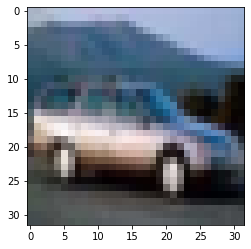

In [ ]:
#loading data set and splitting into trainset testset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))

The class_names list is made based on labels and their standard associated index values in original dataset.

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train = X_train.reshape(50000, 32*32*3) # flatten array
X_test = X_test.reshape(10000, 32*32*3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Normalizing the data in range [0,1]
X_train /= 255.0
X_test /= 255.0

In [ ]:
#converting target values into one hot encoding 
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
#Defining model
model = Sequential()
#hidden layer and input
model.add(Dense(100, input_shape=(32*32*3,), activation='relu'))
#output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate = 0.01))
history = model.fit(X_train, Y_train, batch_size=128, epochs=35, validation_data=(X_test, Y_test))

Epoch 1/35
391/391 [==============================] - 5s 10ms/step - loss: 1.9843 - accuracy: 0.2903 - val_loss: 1.8681 - val_accuracy: 0.3484
Epoch 2/35
391/391 [==============================] - 4s 9ms/step - loss: 1.8382 - accuracy: 0.3570 - val_loss: 1.7930 - val_accuracy: 0.3756
Epoch 3/35
391/391 [==============================] - 4s 9ms/step - loss: 1.7770 - accuracy: 0.3792 - val_loss: 1.7570 - val_accuracy: 0.3854
Epoch 4/35
391/391 [==============================] - 4s 9ms/step - loss: 1.7329 - accuracy: 0.3961 - val_loss: 1.7441 - val_accuracy: 0.3880
Epoch 5/35
391/391 [==============================] - 4s 10ms/step - loss: 1.6994 - accuracy: 0.4081 - val_loss: 1.7000 - val_accuracy: 0.4014
Epoch 6/35
391/391 [==============================] - 4s 9ms/step - loss: 1.6704 - accuracy: 0.4190 - val_loss: 1.6798 - val_accuracy: 0.4057
Epoch 7/35
391/391 [==============================] - 4s 9ms/step - loss: 1.6472 - accuracy: 0.4285 - val_loss: 1.6471 - val_accuracy: 0.4205
Epoc

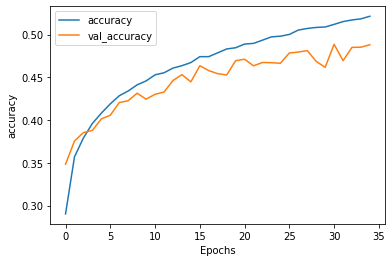

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'accuracy')

In [ ]:
# checking accuracy and loss on test data
loss,acc = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4501 - accuracy: 0.4882


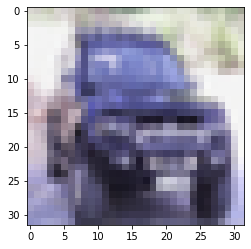

In [ ]:
X_test = X_test.reshape(10000, 32,32,3)
plt.imshow(X_test[9], cmap=plt.get_cmap('gray'))

In [ ]:
print("Above classified object is a",class_names[np.argmax((model.predict(X_test.reshape(10000, 32*32*3)))[9])])

313/313 [==============================] - 1s 3ms/step
Above classified object is a automobile


#Applying binary classification on churn modelling

In [ ]:
import pandas as pd

In [ ]:
bank_df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
# we will convert male = 1 and female = 0
bank_df.Gender = bank_df.Gender.replace('Male',1)
bank_df.Gender = bank_df.Gender.replace('Female',0)

In [ ]:
bank_df=bank_df.drop(columns=['CustomerId','RowNumber','Geography','Surname'])
bank_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# dividing data into train set and test set
train_data1, test_data1 = train_test_split(bank_df, test_size=0.3, random_state=25)

In [ ]:
# Seperating Features and Target values
x_train1, y_train1 = train_data1.drop('Exited', axis=1), train_data1['Exited']
x_test1, y_test1 = test_data1.drop('Exited', axis=1), test_data1['Exited']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#one hot encoding on target values based on no of class
ohe = OneHotEncoder()

y_train1=np.array(y_train1).reshape(-1,1)
y_train1 = ohe.fit_transform(y_train1).toarray()

y_test1=np.array(y_test1).reshape(-1,1)
y_test1 = ohe.fit_transform(y_test1).toarray()

In [ ]:
y_test1

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
#function to normalize the data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the Features of trainset and testset
x_train_scaled_all1, x_test_scaled_all1 = scale_datasets(x_train1, x_test1)

In [ ]:
# Dividing scalled train data into train and validation data

X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(x_train_scaled_all1, y_train1, test_size=0.20, random_state=40)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(5600, 9)
(5600, 2)
(1400, 9)


In [ ]:
# Defining model for classification
model1 = Sequential()
model1.add(Dense(activation = "relu", input_dim = 9, 
                     units = 10, kernel_initializer = "uniform"))
model1.add(Dense(activation = "sigmoid", units = 2, 
                     kernel_initializer = "uniform"))
model1.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                100       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model1.fit(X_train_scaled1 , Y_train1 , batch_size = 1024 ,epochs = 250 )

Epoch 1/250
6/6 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.6571
Epoch 2/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.7911
Epoch 3/250
6/6 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.7911
Epoch 4/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.7911
Epoch 5/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.7911
Epoch 6/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.7911
Epoch 7/250
6/6 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.7911
Epoch 8/250
6/6 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.7911
Epoch 9/250
6/6 [==============================] - 0s 6ms/step - loss: 0.6569 - accuracy: 0.7911
Epoch 10/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.7911
Epoch 11/250
6/6 [===========

In [ ]:
# prediction on scalled train data
pred_train1= model1.predict(X_train_scaled1)
scores = model1.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   
 

175/175 [==============================] - 0s 2ms/step
Accuracy on training data: 79.10714149475098% 
Error on training data: 20.892858505249023


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)
scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))    

94/94 [==============================] - 0s 2ms/step
Accuracy on test data: 80.63333630561829% 
Error on test data: 19.366663694381714


#house price prediction

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h2> 2. Cleaning and Preprocessing

In [8]:
print("Missing value count in Training data")
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Missing value count in Training data
Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
Fals

In [9]:
print("Missing value count in Training data")
missing_data = test.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Missing value count in Training data
Id
False    1459
Name: Id, dtype: int64

MSSubClass
False    1459
Name: MSSubClass, dtype: int64

MSZoning
False    1455
True        4
Name: MSZoning, dtype: int64

LotFrontage
False    1232
True      227
Name: LotFrontage, dtype: int64

LotArea
False    1459
Name: LotArea, dtype: int64

Street
False    1459
Name: Street, dtype: int64

Alley
True     1352
False     107
Name: Alley, dtype: int64

LotShape
False    1459
Name: LotShape, dtype: int64

LandContour
False    1459
Name: LandContour, dtype: int64

Utilities
False    1457
True        2
Name: Utilities, dtype: int64

LotConfig
False    1459
Name: LotConfig, dtype: int64

LandSlope
False    1459
Name: LandSlope, dtype: int64

Neighborhood
False    1459
Name: Neighborhood, dtype: int64

Condition1
False    1459
Name: Condition1, dtype: int64

Condition2
False    1459
Name: Condition2, dtype: int64

BldgType
False    1459
Name: BldgType, dtype: int64

HouseStyle
False    1459
Name: HouseStyle, dt

In [10]:
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].replace(np.nan, test['LotFrontage'].mean())


data['Alley'] = data['Alley'].replace(np.nan,'Grvl')
test['Alley'] = test['Alley'].replace(np.nan,'Grvl')

data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan,data['MasVnrArea'].mean())
test['MasVnrArea'] = test['MasVnrArea'].replace(np.nan,test['MasVnrArea'].mean())



data['BsmtQual'] =  data['BsmtQual'].replace(np.nan,'TA')
test['BsmtQual'] =  test['BsmtQual'].replace(np.nan,'TA')

data['BsmtCond'] =  data['BsmtCond'].replace(np.nan,'TA')
test['BsmtCond'] =  data['BsmtCond'].replace(np.nan,'TA')

data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan,'No')
test['BsmtExposure'] = test['BsmtExposure'].replace(np.nan,'No')

data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan,'Unf')
test['BsmtFinType1'] = test['BsmtFinType1'].replace(np.nan,'Unf')

data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan,'Unf')
test['BsmtFinType2'] = test['BsmtFinType2'].replace(np.nan,'Unf')

data['Electrical'] = data['Electrical'].replace(np.nan,'SBrkr')

data['GarageType'] = data['GarageType'].replace(np.nan,'Attchd')
test['GarageType'] = test['GarageType'].replace(np.nan,'Attchd')

data['GarageFinish'] = data['GarageFinish'].replace(np.nan,'Unf')
test['GarageFinish'] = test['GarageFinish'].replace(np.nan,'Unf')

data['GarageQual'] = data['GarageQual'].replace(np.nan,'TA')
test['GarageQual'] = test['GarageQual'].replace(np.nan,'TA')


data['GarageCond'] = data['GarageCond'].replace(np.nan,'TA')
test['GarageCond'] = test['GarageCond'].replace(np.nan,'TA')

data['PoolQC'] = data['PoolQC'].replace(np.nan,'Gd')
test['PoolQC'] = test['PoolQC'].replace(np.nan,'Gd')

data['Fence'] = data['Fence'].replace(np.nan,'MnPrv')
test['Fence'] = test['Fence'].replace(np.nan,'MnPrv')

data['MiscFeature'] = data['MiscFeature'].replace(np.nan,'Shed')
test['MiscFeature'] = test['MiscFeature'].replace(np.nan,'Shed')




test['MSZoning'] = test['MSZoning'].fillna('RL')
test['Utilities'] =  test['Utilities'].fillna('ALLPub')
test['Exterior1st'] =  test['Exterior1st'].fillna('VinylSd')
test['Exterior2nd'] =  test['Exterior2nd'].fillna('VinylSd')
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median()) 
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median()) 
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())
test ['BsmtFullBath'] = test ['BsmtFullBath'].fillna('0')
test ['HalfBath'] = test ['HalfBath'].fillna('0')
test ['KitchenQual'] = test ['KitchenQual'].fillna('TA')
test ['Functional'] = test ['Functional'].fillna('TA')
test ['GarageCars'] = test ['GarageCars'].fillna(2.0)
test ['GarageArea'] = test ['GarageArea'].fillna(test ['GarageArea'].median())
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].value_counts().idxmax())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].value_counts().idxmax())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())

In [11]:
data.drop(['FireplaceQu','GarageYrBlt','MoSold','YrSold','MasVnrType','Fence', 'MiscFeature','MSSubClass','BsmtFinSF2', 'BsmtUnfSF','Exterior2nd','Condition2','LotShape','BsmtFullBath'],1,inplace=True)
test.drop(['FireplaceQu','GarageYrBlt','MoSold','YrSold','MasVnrType','Fence', 'MiscFeature','MSSubClass','BsmtFinSF2', 'BsmtUnfSF','Exterior2nd','Condition2','LotShape','BsmtFullBath'],1,inplace=True)
data.drop(['Id'],1,inplace=True)
test.drop(['Id'],1,inplace=True)

<ipython-input-11-2609a3c79bf9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['FireplaceQu','GarageYrBlt','MoSold','YrSold','MasVnrType','Fence', 'MiscFeature','MSSubClass','BsmtFinSF2', 'BsmtUnfSF','Exterior2nd','Condition2','LotShape','BsmtFullBath'],1,inplace=True)
<ipython-input-11-2609a3c79bf9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(['FireplaceQu','GarageYrBlt','MoSold','YrSold','MasVnrType','Fence', 'MiscFeature','MSSubClass','BsmtFinSF2', 'BsmtUnfSF','Exterior2nd','Condition2','LotShape','BsmtFullBath'],1,inplace=True)
<ipython-input-11-2609a3c79bf9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Id'],1,inplace=True)
<ipython-input-11-2609a3c79bf9>:4: FutureWarning: In a futu

In [12]:
y = data['SalePrice']
data.drop('SalePrice',1,inplace=True)

<ipython-input-12-5eedcd96ebd1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('SalePrice',1,inplace=True)


In [13]:
for i in data.select_dtypes(['int64']):
    data[i] = data[i]/data[i].max()
for i in test.select_dtypes(['int64']):
    test[i] = test[i]/test[i].max()

for i in data.select_dtypes(['float']):
    data[i] = data[i]/data[i].max()
for i in test.select_dtypes(['float']):
    test[i] = test[i]/test[i].max()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb1 = LabelEncoder()
lb2 = LabelEncoder()
lb3 = LabelEncoder()
lb4 = LabelEncoder()
lb5 = LabelEncoder()
lb6 = LabelEncoder()
lb7 = LabelEncoder()
lb8 = LabelEncoder()
lb9 = LabelEncoder()
lb10 = LabelEncoder()
lb11 = LabelEncoder()
lb12 = LabelEncoder()
lb13 = LabelEncoder()
lb14 = LabelEncoder()
lb15 = LabelEncoder()
lb16 = LabelEncoder()
lb17 = LabelEncoder()
lb18 = LabelEncoder()
lb19 = LabelEncoder()
lb20 = LabelEncoder()
lb21 = LabelEncoder()
lb22 = LabelEncoder()
lb23 = LabelEncoder()
lb24 = LabelEncoder()
lb25 = LabelEncoder()
lb26 = LabelEncoder()
lb27 = LabelEncoder()
lb28 = LabelEncoder()
lb29 = LabelEncoder()
lb30 = LabelEncoder()
lb31 = LabelEncoder()
lb32 = LabelEncoder()
lb33 = LabelEncoder()
lb34 = LabelEncoder()
lb35 = LabelEncoder()
lb36 = LabelEncoder()


data['MSZoning'] = lb1.fit_transform(data['MSZoning'])
data['Street'] = lb2.fit_transform(data['Street'])
data['Alley'] = lb3.fit_transform(data['Alley'])
data['LandContour'] = lb4.fit_transform(data['LandContour'])
data['Utilities'] = lb5.fit_transform(data['Utilities'])
data['LotConfig'] = lb6.fit_transform(data['LotConfig'])
data['LandSlope'] = lb7.fit_transform(data['LandSlope'])
data['Neighborhood'] = lb8.fit_transform(data['Neighborhood'])
data['Condition1'] = lb9.fit_transform(data['Condition1'])
data['BldgType'] = lb10.fit_transform(data['BldgType'])
data['HouseStyle'] = lb11.fit_transform(data['HouseStyle'])
data['RoofStyle'] = lb12.fit_transform(data['RoofStyle'])
data['RoofMatl'] = lb13.fit_transform(data['RoofMatl'])
data['Exterior1st'] = lb14.fit_transform(data['Exterior1st'])
data['ExterQual'] = lb15.fit_transform(data['ExterQual'])
data['ExterCond'] = lb16.fit_transform(data['ExterCond'])
data['Foundation'] = lb17.fit_transform(data['Foundation'])
data['BsmtQual'] = lb18.fit_transform(data['BsmtQual'])
data['BsmtCond'] = lb19.fit_transform(data['BsmtCond'])
data['BsmtExposure'] = lb20.fit_transform(data['BsmtExposure'])
data['BsmtFinType1'] = lb21.fit_transform(data['BsmtFinType1'])
data['BsmtFinType2'] = lb22.fit_transform(data['BsmtFinType1'])
data['Heating'] = lb23.fit_transform(data['Heating'])
data['HeatingQC'] = lb24.fit_transform(data['HeatingQC'])
data['CentralAir'] = lb25.fit_transform(data['CentralAir'])
data['Electrical'] = lb26.fit_transform(data['Electrical'])
data['KitchenQual'] = lb27.fit_transform(data['KitchenQual'])
data['Functional'] = lb28.fit_transform(data['Functional'])
data['GarageType'] = lb29.fit_transform(data['GarageType'])
data['GarageFinish'] = lb30.fit_transform(data['GarageFinish'])
data['GarageQual'] = lb31.fit_transform(data['GarageQual'])
data['GarageCond'] = lb32.fit_transform(data['GarageCond'])
data['PavedDrive'] = lb33.fit_transform(data['PavedDrive'])
data['PoolQC'] = lb34.fit_transform(data['PoolQC'])
data['SaleType'] = lb35.fit_transform(data['SaleType'])
data['SaleCondition'] = lb36.fit_transform(data['SaleCondition'])

In [18]:
lb1 = LabelEncoder()
lb2 = LabelEncoder()
lb3 = LabelEncoder()
lb4 = LabelEncoder()
lb5 = LabelEncoder()
lb6 = LabelEncoder()
lb7 = LabelEncoder()
lb8 = LabelEncoder()
lb9 = LabelEncoder()
lb10 = LabelEncoder()
lb11 = LabelEncoder()
lb12 = LabelEncoder()
lb13 = LabelEncoder()
lb14 = LabelEncoder()
lb15 = LabelEncoder()
lb16 = LabelEncoder()
lb17 = LabelEncoder()
lb18 = LabelEncoder()
lb19 = LabelEncoder()
lb20 = LabelEncoder()
lb21 = LabelEncoder()
lb22 = LabelEncoder()
lb23 = LabelEncoder()
lb24 = LabelEncoder()
lb25 = LabelEncoder()
lb26 = LabelEncoder()
lb27 = LabelEncoder()
lb28 = LabelEncoder()
lb29 = LabelEncoder()
lb30 = LabelEncoder()
lb31 = LabelEncoder()
lb32 = LabelEncoder()
lb33 = LabelEncoder()
lb34 = LabelEncoder()
lb35 = LabelEncoder()
lb36 = LabelEncoder()


test['MSZoning'] = lb1.fit_transform(test['MSZoning'])
test['Street'] = lb2.fit_transform(test['Street'])
test['Alley'] = lb3.fit_transform(test['Alley'])
test['LandContour'] = lb4.fit_transform(test['LandContour'])
test['Utilities'] = lb5.fit_transform(test['Utilities'])
test['LotConfig'] = lb6.fit_transform(test['LotConfig'])
test['LandSlope'] = lb7.fit_transform(test['LandSlope'])
test['Neighborhood'] = lb8.fit_transform(test['Neighborhood'])
test['Condition1'] = lb9.fit_transform(test['Condition1'])
test['BldgType'] = lb10.fit_transform(test['BldgType'])
test['HouseStyle'] = lb11.fit_transform(test['HouseStyle'])
test['RoofStyle'] = lb12.fit_transform(test['RoofStyle'])
test['RoofMatl'] = lb13.fit_transform(test['RoofMatl'])
test['Exterior1st'] = lb14.fit_transform(test['Exterior1st'])
test['ExterQual'] = lb15.fit_transform(test['ExterQual'])
test['ExterCond'] = lb16.fit_transform(test['ExterCond'])
test['Foundation'] = lb17.fit_transform(test['Foundation'])
test['BsmtQual'] = lb18.fit_transform(test['BsmtQual'])
test['BsmtCond'] = lb19.fit_transform(test['BsmtCond'])
test['BsmtExposure'] = lb20.fit_transform(test['BsmtExposure'])
test['BsmtFinType1'] = lb21.fit_transform(test['BsmtFinType1'])
test['BsmtFinType2'] = lb22.fit_transform(test['BsmtFinType1'])
test['Heating'] = lb23.fit_transform(test['Heating'])
test['HeatingQC'] = lb24.fit_transform(test['HeatingQC'])
test['CentralAir'] = lb25.fit_transform(test['CentralAir'])
test['Electrical'] = lb26.fit_transform(test['Electrical'])
test['KitchenQual'] = lb27.fit_transform(test['KitchenQual'])
test['Functional'] = lb28.fit_transform(test['Functional'])
test['GarageType'] = lb29.fit_transform(test['GarageType'])
test['GarageFinish'] = lb30.fit_transform(test['GarageFinish'])
test['GarageQual'] = lb31.fit_transform(test['GarageQual'])
test['GarageCond'] = lb32.fit_transform(test['GarageCond'])
test['PavedDrive'] = lb33.fit_transform(test['PavedDrive'])
test['PoolQC'] = lb34.fit_transform(test['PoolQC'])
test['SaleType'] = lb35.fit_transform(test['SaleType'])
test['SaleCondition'] = lb36.fit_transform(test['SaleCondition'])

In [19]:
print(data.shape)
print(test.shape)

(1460, 65)
(1459, 65)


In [20]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition
0,3,0.207668,0.039258,1,0,3,0,4,0,5,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,2,0.0,8,4
1,3,0.255591,0.044600,1,0,3,0,2,0,24,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,2,0.0,8,4
2,3,0.217252,0.052266,1,0,3,0,4,0,5,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,2,0.0,8,4
3,3,0.191693,0.044368,1,0,3,0,0,0,6,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,2,0.0,8,0
4,3,0.268371,0.066250,1,0,3,0,2,0,15,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,2,0.0,8,4


In [21]:
test.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition
0,2,0.400,0.205336,1,0,3,1,4,0,12,...,0.098315,0.000000,0.0,0.0,0.208333,0.0,1,0.000000,8,4
1,3,0.405,0.252067,1,0,3,1,0,0,12,...,0.275983,0.048518,0.0,0.0,0.000000,0.0,1,0.735294,8,4
2,3,0.370,0.244346,1,0,3,1,4,0,8,...,0.148876,0.045822,0.0,0.0,0.000000,0.0,1,0.000000,8,4
3,3,0.390,0.176290,1,0,3,1,4,0,8,...,0.252809,0.048518,0.0,0.0,0.000000,0.0,1,0.000000,8,4
4,3,0.215,0.088428,1,0,1,1,4,0,22,...,0.000000,0.110512,0.0,0.0,0.250000,0.0,1,0.000000,8,4


<h2>3. Splitting and preprocessing

In [22]:
X = data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

<h2>4. Model Development

In [23]:
from keras.models import Model

In [ ]:
inputs = Input(shape = 65)
x = Dense(19,activation = 'relu')(inputs)
x = Dense(19,activation = 'relu')(x)
x = Dense(19,activation = 'relu')(x)
x = Dense(19,activation = 'relu')(x)
outputs = Dense(1)(x)
model = Model(inputs,outputs)
model.compile(loss = 'mse',optimizer = 'adam')

In [ ]:
history = model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
9/9 [==============================] - 1s 31ms/step - loss: 39404019712.0000 - val_loss: 37945028608.0000
Epoch 2/400
9/9 [==============================] - 0s 9ms/step - loss: 39403708416.0000 - val_loss: 37944627200.0000
Epoch 3/400
9/9 [==============================] - 0s 6ms/step - loss: 39403151360.0000 - val_loss: 37943803904.0000
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 39401938944.0000 - val_loss: 37942005760.0000
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 39399370752.0000 - val_loss: 37938421760.0000
Epoch 6/400
9/9 [==============================] - 0s 5ms/step - loss: 39394770944.0000 - val_loss: 37932564480.0000
Epoch 7/400
9/9 [==============================] - 0s 5ms/step - loss: 39387320320.0000 - val_loss: 37922910208.0000
Epoch 8/400
9/9 [==============================] - 0s 5ms/step - loss: 39374913536.0000 - val_loss: 37907046400.0000
Epoch 9/400
9/9 [==============================] - 0s 5ms/step 

In [ ]:
def plot_function_regression(history):
    plt.figure(figsize = (15,7))
    plt.plot(history.history['loss'],color = 'red',label = 'train_loss')
    plt.title('Loss and val_loss')
    plt.plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

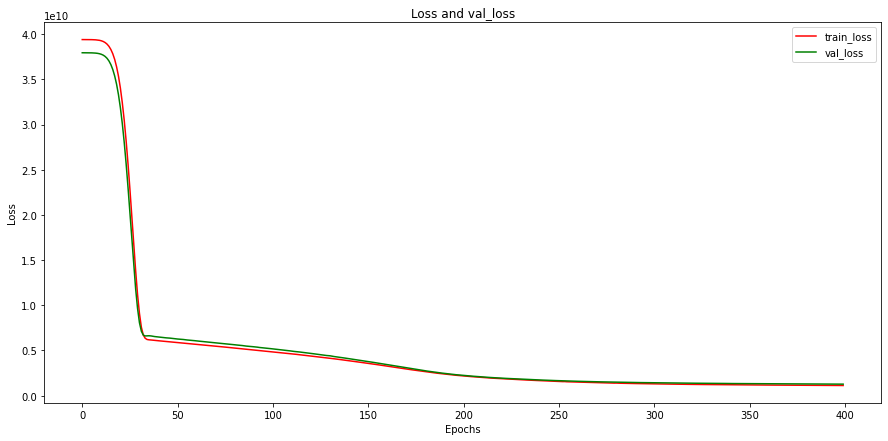

In [ ]:
plot_function_regression(history)

#heart dataset ann

In [ ]:
df_heart=pd.read_csv('heart.csv')
df_heart.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


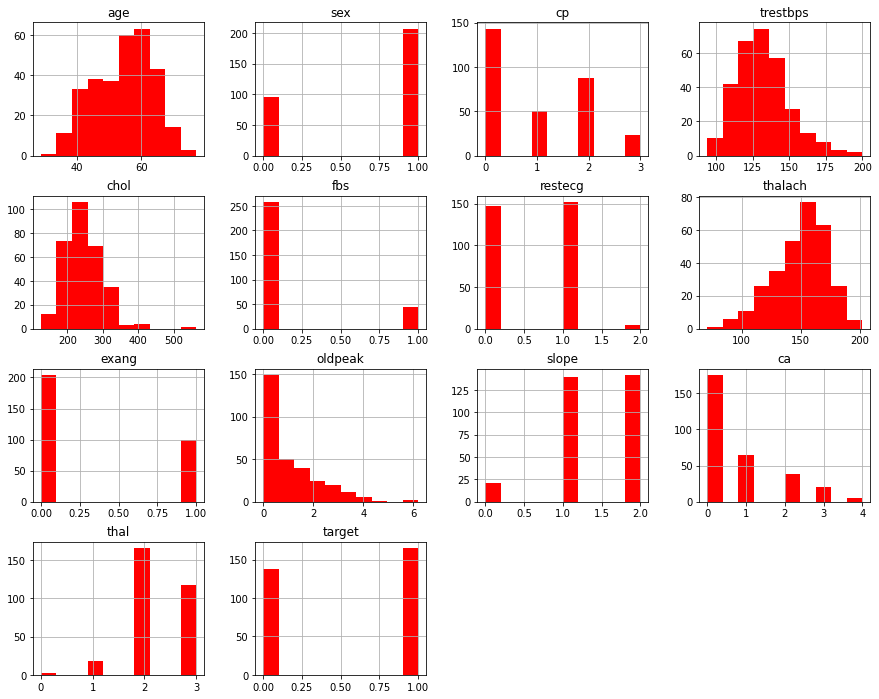

In [ ]:
df_heart.hist(figsize=(15,12),bins = 10, color='red')
plt.title("Features Distribution for heart dataset")
plt.show()

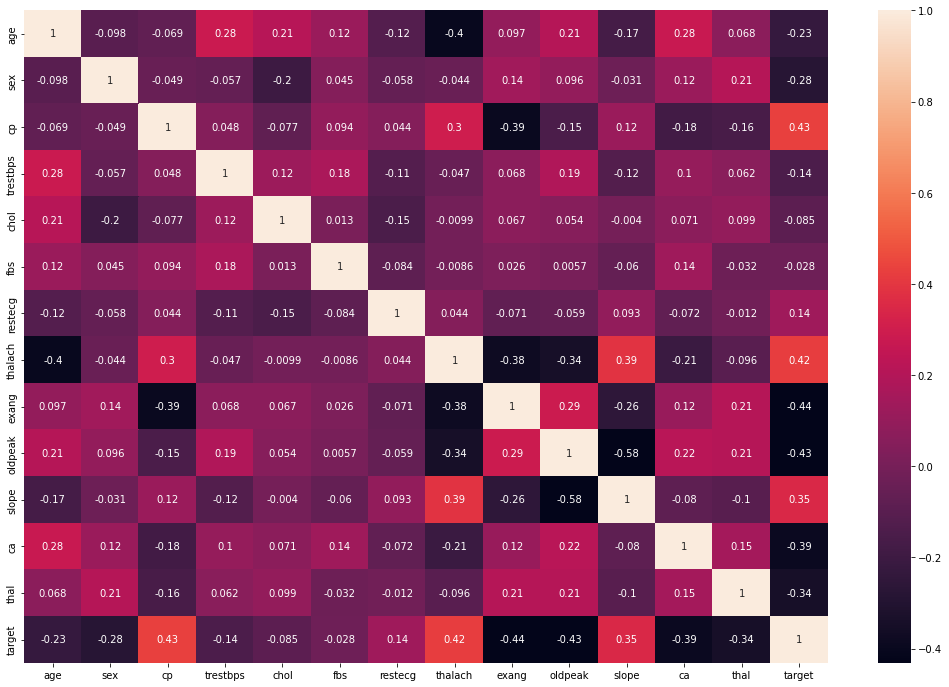

In [ ]:
import seaborn as sns
plt.subplots(figsize=(18,12))
sns.heatmap(df_heart.corr(),robust=True,annot=True)

In [ ]:
# dividing data into train set and test set
train_data1, test_data1 = train_test_split(df_heart, test_size=0.2, random_state=30)

In [ ]:
# Seperating Features and Target values
x_train1, y_train1 = train_data1.drop('target', axis=1), train_data1['target']
x_test1, y_test1 = test_data1.drop('target', axis=1), test_data1['target']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_test1.shape

(61,)

In [ ]:
ohe = OneHotEncoder()

y_train1=np.array(y_train1).reshape(-1,1)
y_train1 = ohe.fit_transform(y_train1).toarray()

y_test1=np.array(y_test1).reshape(-1,1)
y_test1 = ohe.fit_transform(y_test1).toarray()

In [ ]:
#normalizing data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the Features of trainset and testset
x_train_scaled_all1, x_test_scaled_all1 = scale_datasets(x_train1, x_test1)

In [ ]:
# Dividing scaled train data into train and validation data

X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(x_train_scaled_all1, y_train1, test_size=0.20, random_state=25)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)


(193, 13)
(193, 2)
(49, 13)


In [ ]:
# Defining model for classification
model1 = Sequential()
model1.add(Dense(activation = "relu", input_dim = 13, units = 10, kernel_initializer = "uniform"))
model1.add(Dense(activation = "relu", units = 9,kernel_initializer = "uniform"))
model1.add(Dense(activation = "softmax", units = 2,kernel_initializer = "uniform"))
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 9)                 99        
                                                                 
 dense_8 (Dense)             (None, 2)                 20        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1= model1.fit(X_train_scaled1 , Y_train1 , batch_size = 8 ,epochs = 200 )

Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5699
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.7254
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.8394
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.8446
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.8549
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.8446
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8549
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8653
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8653
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8705
Epoch 11/

In [ ]:
# prediction on scalled train data
pred_train1= model1.predict(X_train_scaled1)
scores = model1.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   

7/7 [==============================] - 0s 2ms/step
Accuracy on training data: 97.92746305465698% 
Error on training data: 2.0725369453430176


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)

scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))  

2/2 [==============================] - 0s 7ms/step
Accuracy on test data: 83.60655903816223% 
Error on test data: 16.39344096183777


In [ ]:
#Converting predictions to label(reversing onehot encoding operation)
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i])) 

In [ ]:
#Converting predictions to label(reversing onehot encoding operation) 
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i]))

In [ ]:
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


#heart dataset using logistic regression

In [ ]:
def x_y(df_heart, target):
  return df_heart.loc[:,df_heart.columns!=target], df_heart[target]

In [ ]:
def train_test_val_split(x, y):
  x1,x_test,y1, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 40 )
  x_train, x_val, y_train, y_val = train_test_split(x1 , y1, test_size = 0.25 , random_state = 40 )
  return x_train, x_val, x_test, y_train, y_val , y_test

In [ ]:
def encode(x):
  enc = OneHotEncoder()
  return enc.fit_transform(np.array(x).reshape(-1,1)).toarray()

In [ ]:
x4, y4 = x_y(df_heart, 'target')

In [ ]:
x4_train, x4_val, x4_test, y4_train, y4_val, y4_test = train_test_val_split(x4, y4)

In [ ]:
y4_train_log=y4_train
y4_test_log=y4_test
y4_val_log=y4_val

In [ ]:
y4_train=encode(y4_train)
y4_test=encode(y4_test)
y4_val=encode(y4_val)

In [ ]:
x4_train = scale(x4_train)
x4_val = scale(x4_val)
x4_test = scale(x4_test)

In [ ]:
model42 = linear_model.LogisticRegression()
model42.fit(x4_train , y4_train_log)

LogisticRegression()

In [ ]:
y_pred42 = model42.predict(x4_test)

In [ ]:
cm = confusion_matrix(y4_test_log, y_pred42)

In [ ]:
print ("Accuracy : ", accuracy_score(y4_test_log, y_pred42)*100)

Accuracy :  88.52459016393442
